In [8]:
import os, sys
import cv2
import numpy as np
import pickle
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import MaxPooling2D, Conv2D, Dense, Flatten
import matplotlib.pyplot as plt
def get_data_from_file(train_file):
    train_data = []
    # enter your code here (7 points)
    with open(train_file) as fp:
        lines=fp.readlines()
    for k,line in enumerate(lines):
        print('{:6d} /{:6d}'.format(k+1, len(lines)), end='\r')
        img_path = os.path.join('dogs_and_cats\\train', line.split()[0])
        try:
            img = cv2.imread(img_path)
            img_resized = cv2.resize(img, (48, 48))
            if 'cat' in line:
                label = 0
            elif 'dog' in line:
                label = 1
            train_data.append([img_resized, label])
        except:
                print('Error reading file:', img_path)
    return train_data

def get_image_and_label(train_data):
  # enter your code here (8 points)
    x_train=np.array([i[0] for i in train_data]).reshape(-1,48,48,3)
    y_train=np.array([i[1] for i in train_data])
    return x_train, y_train
def assignment4b_1():
    train_file = 'train_list.txt'
    test_file = 'test_list.txt'
    train_data = get_data_from_file(train_file)
    X_train, Y_train = get_image_and_label(train_data)
    print()  
    test_data = get_data_from_file(test_file)
    X_test, Y_test = get_image_and_label(test_data)
    print()
    print(len(train_data))
    print(train_data[0][0].shape)
    print(len(test_data))
    print(test_data[0][0].shape)

    save_path = 'dogs_cats.pkl'
    print('Saving to', save_path)
    data = {}
    data['X_train'] = X_train
    data['Y_train'] = Y_train
    data['X_test'] = X_test
    data['Y_test'] = Y_test
    pickle.dump(data, open(save_path, 'wb'))

def build_model():
  # enter your code here, and remove the following pass (15 points)
    inputs = tf.keras.Input((48, 48, 3),name='input')
    x=Conv2D(32,3,1,'same',activation='relu',name='conv2d_3')(inputs)
    x=MaxPooling2D(2,2,name='max_pool_3')(x)
    
    x=Conv2D(32,3,1,'same',activation='relu',name='conv2d_4')(x)
    x=MaxPooling2D(2,2,name='max_pool_4')(x)
    
    x=Conv2D(32,3,1,'same',activation='relu',name='conv2d_5')(x)
    x=MaxPooling2D(2,2,name='max_pool_5')(x)
    x=Flatten(name='flatten_1')(x)
    out=Dense(2,activation='softmax',name='dense_1')(x)
    return tf.keras.Model(inputs = inputs, outputs = out)  
def assignment4b_2():
    data = pickle.load(open("dogs_cats.pkl","rb"))
    X_train, Y_train, X_test, Y_test = data["X_train"], data["Y_train"], data["X_test"], data["Y_test"]
    X_train = X_train / 255.0
    X_test = X_test / 255.0
    model = build_model()
    model.summary()
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    ck_dir = "ckpt_dogcat"
    checkpoint_path = ck_dir+"/cp-{epoch:04d}.ckpt"
    cp_callback = keras.callbacks.ModelCheckpoint(checkpoint_path, save_weights_only=True, verbose=1, period=10)
    batch_size = 64
    epochs = 60
  # enter your code here (5 points)
   
    history = model.fit(X_train, Y_train, epochs, batch_size,callbacks=[cp_callback], validation_split=0.1, shuffle=True)
    test_loss, test_acc = model.evaluate(X_test, Y_test)
    print(f'test_loss:{test_loss},test_acc:{test_acc}')
    pickle.dump(history.history, open("history.pkl", 'wb'))

def assignment4b_3():
  # enter your code here, and remove the following pass (5 points)
    history = pickle.load(open("history.pkl","rb"))
    fig=plt.figure()
    plt.subplot(2,1,1)
    plt.plot(history['accuracy'])
    plt.plot(history['val_accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    plt.subplot(2,1,2)
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

def assignment4b_4():
  # enter your code here, and remove the following pass (5 points)
    data = pickle.load(open("dogs_cats.pkl","rb"))
    X_train, Y_train, X_test, Y_test = data["X_train"], data["Y_train"], data["X_test"], data["Y_test"]
    X_train = X_train / 255.0
    X_test = X_test / 255.0
    model = build_model()
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    for epoch in range(10,70,10):
        ck_dir = "ckpt_dogcat"
        checkpoint_path = ck_dir+"/cp-00"+str(epoch)+".ckpt"
        model.load_weights(checkpoint_path)
        test_loss, test_acc = model.evaluate(X_test, Y_test)
        print(f"Epoch {epoch}->Testing Accuracy: {(test_acc):.2f}%")


In [40]:
if __name__ == '__main__':
    assignment4b_1() # do not modify this line

 20000 / 20000
  5000 /  5000
20000
(48, 48, 3)
5000
(48, 48, 3)
Saving to dogs_cats.pkl


In [41]:
    assignment4b_2() # do not modify this line

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 48, 48, 3)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 48, 48, 32)        896       
                                                                 
 max_pool_3 (MaxPooling2D)   (None, 24, 24, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pool_4 (MaxPooling2D)   (None, 12, 12, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pool_5 (MaxPooling2D)   (None, 6, 6, 32)          0   

Epoch 42/64
300/300 [==============================] - 20s 68ms/step - loss: 0.0255 - accuracy: 0.9922 - val_loss: 0.9918 - val_accuracy: 0.7980
Epoch 43/64
300/300 [==============================] - 19s 64ms/step - loss: 0.0400 - accuracy: 0.9862 - val_loss: 1.0512 - val_accuracy: 0.7940
Epoch 44/64
300/300 [==============================] - 19s 64ms/step - loss: 0.0299 - accuracy: 0.9894 - val_loss: 1.0366 - val_accuracy: 0.8000
Epoch 45/64
300/300 [==============================] - 20s 65ms/step - loss: 0.0144 - accuracy: 0.9967 - val_loss: 1.0689 - val_accuracy: 0.8140
Epoch 46/64
300/300 [==============================] - 19s 64ms/step - loss: 0.0382 - accuracy: 0.9862 - val_loss: 1.1167 - val_accuracy: 0.7965
Epoch 47/64
300/300 [==============================] - 19s 64ms/step - loss: 0.0264 - accuracy: 0.9909 - val_loss: 1.1816 - val_accuracy: 0.8010
Epoch 48/64
300/300 [==============================] - 19s 64ms/step - loss: 0.0244 - accuracy: 0.9917 - val_loss: 1.1196 - val_ac

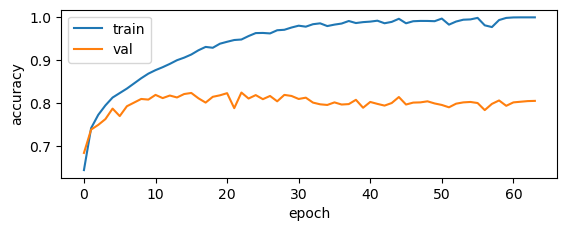

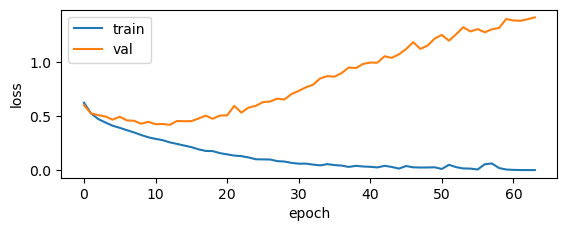

In [42]:
    assignment4b_3() # do not modify this line

In [9]:
    assignment4b_4() # do not modify this line

157/157 [==============================] - 3s 9ms/step - loss: 0.3894 - accuracy: 0.8278
Epoch 10->Testing Accuracy: 0.83%
157/157 [==============================] - 1s 8ms/step - loss: 0.4550 - accuracy: 0.8380
Epoch 20->Testing Accuracy: 0.84%
157/157 [==============================] - 1s 8ms/step - loss: 0.6544 - accuracy: 0.8310
Epoch 30->Testing Accuracy: 0.83%
157/157 [==============================] - 1s 9ms/step - loss: 0.8746 - accuracy: 0.8214
Epoch 40->Testing Accuracy: 0.82%
157/157 [==============================] - 1s 9ms/step - loss: 1.0992 - accuracy: 0.8250
Epoch 50->Testing Accuracy: 0.82%
157/157 [==============================] - 1s 9ms/step - loss: 1.2224 - accuracy: 0.8294
Epoch 60->Testing Accuracy: 0.83%


In [44]:
# Question 1 (5 points): If we set shuffle=False during the execution of model.fit() in Assignment 4b-2,
# which was previously set to shuffle=True, what impact will this have on the validation accuracy?
# Write down your answer here.
'''
如果將shuffle設置為False，模型會按照數據集中的順序進行訓練，而不是每次從數據集中隨機選擇樣本。
這可能會導致模型在訓練期間學習到數據的某些特定模式，而不是一般化的模式，這可能會導致驗證準確度下降。
因此，如果數據集中樣本的順序對模型的性能有影響，那麼將shuffle設置為False可能會降低驗證準確度。
'''

'\n如果將shuffle設置為False，模型會按照數據集中的順序進行訓練，而不是每次從數據集中隨機選擇樣本。\n這可能會導致模型在訓練期間學習到數據的某些特定模式，而不是一般化的模式，這可能會導致驗證準確度下降。\n因此，如果數據集中樣本的順序對模型的性能有影響，那麼將shuffle設置為False可能會降低驗證準確度。\n'

In [10]:
# Question 2 (5 points): In Assignment 4b-4, what epoch yields the highest test accuracy, and what is the reason for this?
# Write down your answer here.
'''
第 20 個 epoch 獲得了最高的測試準確率，為 0.84%。
原因可能是模型在這個 epoch 達到了最佳的權重參數組合，能夠在測試集上取得最好的表現。
隨著訓練繼續進行，模型可能會出現過擬合現象，導致測試準確率下降。
'''

'\n第 20 個 epoch 獲得了最高的測試準確率，為 0.84%。\n原因可能是模型在這個 epoch 達到了最佳的權重參數組合，能夠在測試集上取得最好的表現。\n隨著訓練繼續進行，模型可能會出現過擬合現象，導致測試準確率下降。\n'